**This document looks into the clinical data of TCGA-HNSC. Originally, there are 528 of such cases. Later on it falls to 527 due to a patient not having age_of_diangosis (its a nan-value). Also, of the 528 patients, only 523 have WSI images with them, and counting the lost patient we are at 522. Of the original 1263 WSI, only 1199 could be processed as 64 had the mpp-x property missing. Patient-wise, 49 are lost this way. So the final number of patients can be calculated as 522-49 = 473**

In [59]:
import pandas as pd

# Load the clinical.tsv file
clinical_data = pd.read_csv('clinical.tsv', sep='\t')

print(clinical_data.shape[0])

# Count the number of unique instances in the "case_submitter_id" column
unique_case_submitter_id_count = clinical_data['case_submitter_id'].nunique()

print(f"Number of unique instances in 'case_submitter_id' column: {unique_case_submitter_id_count}")


1056
Number of unique instances in 'case_submitter_id' column: 528


In [60]:
for column in clinical_data.columns:
    print(f"Column: {column}")
    value_counts = clinical_data[column].value_counts(normalize=True) * 100
    for value, percentage in value_counts.items():
        print(f"  Value: {value}, Percentage: {percentage:.2f}%")
    print("\n" + "="*50 + "\n")

Column: case_id
  Value: 01420c4e-6013-4d3f-87bd-a6cd9e3f8e87, Percentage: 0.19%
  Value: a63ca97d-ef31-4118-9547-a6730967290f, Percentage: 0.19%
  Value: ad6c9d09-2c03-4786-a72d-dd2aa5f603d4, Percentage: 0.19%
  Value: acd98e20-d2da-4256-99a5-13e261bc88e6, Percentage: 0.19%
  Value: ac511727-185b-4ac0-b6c0-dc3a79657be6, Percentage: 0.19%
  Value: abbcc1d8-ab74-4459-bf28-cc627bef440e, Percentage: 0.19%
  Value: aad9a83a-ab62-47b0-990c-527ccdb58d63, Percentage: 0.19%
  Value: aa34f900-b2e4-4276-9d28-807ad11444ac, Percentage: 0.19%
  Value: aa10d6da-ba20-43e8-ab8f-a9b4b58738b4, Percentage: 0.19%
  Value: a98263a5-cc90-4734-b6f1-f0108bfd5cac, Percentage: 0.19%
  Value: a9017cd4-df30-46eb-b08f-39540b15243f, Percentage: 0.19%
  Value: a8fe444f-57a5-4364-ab55-09f41ecb4591, Percentage: 0.19%
  Value: a8a391ba-e595-4a91-bd55-02b312e55427, Percentage: 0.19%
  Value: a88d6f62-88da-40c4-bc16-7fe58f038b8c, Percentage: 0.19%
  Value: a71b425b-ccd3-42f0-8163-3721cb1794ef, Percentage: 0.19%
  Value: 

In [61]:
import pandas as pd

# Load the clinical.tsv file
clinical_data = pd.read_csv('clinical.tsv', sep='\t')

# Remove rows with repeating case_submitter_ids, keeping only the first instance
clinical_data_unique = clinical_data.drop_duplicates(subset='case_submitter_id', keep='first')

# Display the resulting DataFrame to confirm
print(f"DataFrame after removing duplicates based on 'case_submitter_id':")
print(clinical_data_unique.shape[0])


DataFrame after removing duplicates based on 'case_submitter_id':
528


In [62]:
# Step 1: Calculate and identify columns to drop based on 100% identical values
columns_to_drop = []

# Identify columns to drop
for column in clinical_data_unique.columns:
    value_counts = clinical_data_unique[column].value_counts(normalize=True) * 100
    if any(value_counts == 100):
        columns_to_drop.append(column)

# Create a new DataFrame without the identified columns
clinical_data_filtered = clinical_data_unique.drop(columns=columns_to_drop)

print(f"Dropped columns: {columns_to_drop}")

# Step 2: Recalculate and print the percentage of each unique value in the remaining columns of the new DataFrame
for column in clinical_data_filtered.columns:
    print(f"Column: {column}")
    value_counts = clinical_data_filtered[column].value_counts(normalize=True) * 100
    for value, percentage in value_counts.items():
        print(f"  Value: {value}, Percentage: {percentage:.2f}%")
    print("\n" + "="*50 + "\n")


Dropped columns: ['project_id', 'age_is_obfuscated', 'cause_of_death', 'cause_of_death_source', 'country_of_birth', 'country_of_residence_at_enrollment', 'education_level', 'marital_status', 'occupation_duration_years', 'premature_at_birth', 'weeks_gestation_at_birth', 'adrenal_hormone', 'ann_arbor_b_symptoms', 'ann_arbor_b_symptoms_described', 'ann_arbor_clinical_stage', 'ann_arbor_extranodal_involvement', 'ann_arbor_pathologic_stage', 'best_overall_response', 'burkitt_lymphoma_clinical_variant', 'cancer_detection_method', 'child_pugh_classification', 'clark_level', 'classification_of_tumor', 'cog_liver_stage', 'cog_neuroblastoma_risk_group', 'cog_renal_stage', 'cog_rhabdomyosarcoma_risk_group', 'contiguous_organ_invaded', 'days_to_best_overall_response', 'days_to_last_known_disease_status', 'days_to_recurrence', 'diagnosis_is_primary_disease', 'double_expressor_lymphoma', 'double_hit_lymphoma', 'eln_risk_classification', 'enneking_msts_grade', 'enneking_msts_metastasis', 'enneking_ms

In [63]:
clinical_data_filtered = clinical_data_filtered.drop(columns=['age_at_index','days_to_birth','days_to_death','vital_status','year_of_birth','year_of_death','days_to_diagnosis','days_to_last_follow_up','site_of_resection_or_biopsy','year_of_diagnosis'])

for column in clinical_data_filtered.columns:
    print(f"Column: {column}")
    value_counts = clinical_data_filtered[column].value_counts(normalize=True) * 100
    for value, percentage in value_counts.items():
        print(f"  Value: {value}, Percentage: {percentage:.2f}%")
    print("\n" + "="*50 + "\n")

Column: case_id
  Value: 01420c4e-6013-4d3f-87bd-a6cd9e3f8e87, Percentage: 0.19%
  Value: a63ca97d-ef31-4118-9547-a6730967290f, Percentage: 0.19%
  Value: ad6c9d09-2c03-4786-a72d-dd2aa5f603d4, Percentage: 0.19%
  Value: acd98e20-d2da-4256-99a5-13e261bc88e6, Percentage: 0.19%
  Value: ac511727-185b-4ac0-b6c0-dc3a79657be6, Percentage: 0.19%
  Value: abbcc1d8-ab74-4459-bf28-cc627bef440e, Percentage: 0.19%
  Value: aad9a83a-ab62-47b0-990c-527ccdb58d63, Percentage: 0.19%
  Value: aa34f900-b2e4-4276-9d28-807ad11444ac, Percentage: 0.19%
  Value: aa10d6da-ba20-43e8-ab8f-a9b4b58738b4, Percentage: 0.19%
  Value: a98263a5-cc90-4734-b6f1-f0108bfd5cac, Percentage: 0.19%
  Value: a9017cd4-df30-46eb-b08f-39540b15243f, Percentage: 0.19%
  Value: a8fe444f-57a5-4364-ab55-09f41ecb4591, Percentage: 0.19%
  Value: a8a391ba-e595-4a91-bd55-02b312e55427, Percentage: 0.19%
  Value: a88d6f62-88da-40c4-bc16-7fe58f038b8c, Percentage: 0.19%
  Value: a71b425b-ccd3-42f0-8163-3721cb1794ef, Percentage: 0.19%
  Value: 

In [64]:
print(clinical_data_filtered.shape[0])

528


In [65]:
def map_icd_to_site(icd_code):
    """Maps ICD-10 code to the corresponding AJCC site."""
    
    if icd_code in ['C02.9', 'C04.9', 'C06.9', 'C06.0', 'C03.9', 'C00.9', 'C05.0', 'C03.1', 'C04.0', 'C06.2', 'C02.1', 'C05.9', 'C03.0', 'C02.2']:
        return 'Section 3'
    
    elif icd_code in ['C32.9','C32.1']:
        return 'Section 5'
    
    elif icd_code == 'C14.8':
        return 'Section 9'
    
    elif icd_code in ['C09.9', 'C01', 'C10.9', 'C10.3','C13.9']:
        return 'Section 4'
    
    elif icd_code == 'C41.1':
        return 'Section 27'
    
    else:
        return 'Unknown Site'
    

In [66]:
def map_section_3_6th_to_7th(t_stage_6th, n_stage_6th, m_stage_6th):
    """Maps AJCC 6th edition to 7th edition for Section 3: Lip and Oral Cavity."""
    # T4 lesions have been divided into T4a (moderately advanced local disease) 
    # and T4b (very advanced local disease), leading to the stratification of 
    # Stage IV into Stage IVA, IVB, and IVC.
    if t_stage_6th == 'T4':
        return 'T4a', n_stage_6th, m_stage_6th  # T4 has been split into T4a and T4b
    else:
        return t_stage_6th, n_stage_6th, m_stage_6th

def map_section_4_6th_to_7th(t_stage_6th, n_stage_6th, m_stage_6th, tissue_or_organ):
    """Maps AJCC 6th edition to 7th edition for Section 4: Pharynx, taking specific subregions into account."""
    # For nasopharynx:
    # T2a lesions are now designated as T1, making Stage IIA now Stage I.
    # T2b lesions are now designated as T2, making Stage IIB now Stage II.
    # Retropharyngeal lymph node(s), regardless of location, is considered N1.
    # For oropharynx and hypopharynx:
    # T4 lesions have been divided into T4a (moderately advanced local disease)
    # and T4b (very advanced local disease), leading to the stratification of 
    # Stage IV into Stage IVA, IVB, and IVC.
    
    if tissue_or_organ == 'Nasopharynx':
        if t_stage_6th == 'T2a':
            return 'T1', n_stage_6th, m_stage_6th  # T2a is now T1
        elif t_stage_6th == 'T2b':
            return 'T2', n_stage_6th, m_stage_6th  # T2b is now T2
        else:
            return t_stage_6th, n_stage_6th, m_stage_6th

    elif tissue_or_organ in ['Oropharynx, NOS', 'Tonsil, NOS', 'Hypopharynx, NOS', 'Base of tongue, NOS', 'Posterior wall of oropharynx']:
        if t_stage_6th == 'T4':
            return 'T4a', n_stage_6th, m_stage_6th  # T4 is split into T4a and T4b
        else:
            return t_stage_6th, n_stage_6th, m_stage_6th
    
    else:
        return t_stage_6th, n_stage_6th, m_stage_6th

def map_section_5_6th_to_7th(t_stage_6th, n_stage_6th, m_stage_6th):
    """Maps AJCC 6th edition to 7th edition for Section 5: Larynx."""
    # T4 lesions have been divided into T4a (moderately advanced local disease) 
    # and T4b (very advanced local disease), leading to the stratification of 
    # Stage IV into Stage IVA, IVB, and IVC.
    if t_stage_6th == 'T4':
        return 'T4a', n_stage_6th, m_stage_6th  # T4 has been split into T4a and T4b
    else:
        return t_stage_6th, n_stage_6th, m_stage_6th

def map_section_9_6th_to_7th(t_stage_6th, n_stage_6th, m_stage_6th):
    """Maps AJCC 6th edition to 7th edition for Section 9: Mucosal Melanoma of the Head and Neck."""
    # No changes needed for Section 9 as it didn't exist in the 6th edition.
    return t_stage_6th, n_stage_6th, m_stage_6th

def map_section_27_6th_to_7th(t_stage_6th, n_stage_6th, m_stage_6th):
    """Maps AJCC 6th edition to 7th edition for Section 27: Bone (Mandible)."""
    # Stage III is reserved for G3 and G4 grades in the 7th edition.
    return t_stage_6th, n_stage_6th, m_stage_6th


    
def map_ajcc_6th_to_7th(icd_code, t_stage_6th, n_stage_6th, m_stage_6th, tissue_or_organ, grade=None):
    """Maps AJCC 6th edition to 7th edition based on the section derived from the ICD-10 code."""
    section = map_icd_to_site(icd_code)
    
    if section == 'Section 3':
        return map_section_3_6th_to_7th(t_stage_6th, n_stage_6th, m_stage_6th)
    elif section == 'Section 4':
        return map_section_4_6th_to_7th(t_stage_6th, n_stage_6th, m_stage_6th, tissue_or_organ)
    elif section == 'Section 5':
        return map_section_5_6th_to_7th(t_stage_6th, n_stage_6th, m_stage_6th)
    elif section == 'Section 9':
        return map_section_9_6th_to_7th(t_stage_6th, n_stage_6th, m_stage_6th)
    elif section == 'Section 27':
        return map_section_27_6th_to_7th(t_stage_6th, n_stage_6th, m_stage_6th)
    else:
        return 'Unknown Section', t_stage_6th, n_stage_6th, m_stage_6th

In [67]:
def map_section_3_5th_to_6th(t_stage_5th, n_stage_5th, m_stage_5th):
    """Maps AJCC 5th edition to 6th edition for Section 3: Lip and Oral Cavity."""
    # T4 lesions have been divided into T4a (resectable) and T4b (unresectable), 
    # leading to the division of Stage IV into Stage IVA, IVB, and IVC.
    if t_stage_5th == 'T4':
        return 'T4a', n_stage_5th, m_stage_5th  # Assuming resectable; adjust if needed
    else:
        return t_stage_5th, n_stage_5th, m_stage_5th

def map_section_4_5th_to_6th(t_stage_5th, n_stage_5th, m_stage_5th, tissue_or_organ):
    """Maps AJCC 5th edition to 6th edition for Section 4: Pharynx, taking specific subregions into account."""
    # For oropharynx and hypopharynx only:
    # T4 lesions have been divided into T4a (resectable) and T4b (unresectable),
    # leading to the division of Stage IV into Stage IVA, IVB, and IVC.
    
    if tissue_or_organ in ['Oropharynx, NOS', 'Tonsil, NOS', 'Hypopharynx, NOS', 'Base of tongue, NOS', 'Posterior wall of oropharynx']:
        if t_stage_5th == 'T4':
            return 'T4a', n_stage_5th, m_stage_5th  # Assuming resectable; adjust if needed
        else:
            return t_stage_5th, n_stage_5th, m_stage_5th
    
    # Default if no specific rules apply
    else:
        return t_stage_5th, n_stage_5th, m_stage_5th

def map_section_5_5th_to_6th(t_stage_5th, n_stage_5th, m_stage_5th):
    """Maps AJCC 5th edition to 6th edition for Section 5: Larynx."""
    # T4 lesions have been divided into T4a (resectable) and T4b (unresectable),
    # leading to the division of Stage IV into Stage IVA, IVB, and IVC.
    if t_stage_5th == 'T4':
        return 'T4a', n_stage_5th, m_stage_5th  # Assuming resectable; adjust if needed
    else:
        return t_stage_5th, n_stage_5th, m_stage_5th

def map_section_9_5th_to_6th(t_stage_5th, n_stage_5th, m_stage_5th):
    """Maps AJCC 5th edition to 6th edition for Section 9: Mucosal Melanoma of the Head and Neck."""
    # No changes needed for Section 9 as it did not exist in the 6th edition.
    return t_stage_5th, n_stage_5th, m_stage_5th

def map_section_27_5th_to_6th(t_stage_5th, n_stage_5th, m_stage_5th):
    """Maps AJCC 5th edition to 6th edition for Section 27: Bone (Mandible)."""
    # M1 lesions have been divided into M1a and M1b:
    # - M1a is lung-only metastases (Stage IVA)
    # - M1b is metastases to other distant sites, including lymph nodes (Stage IVB).
    if m_stage_5th == 'M1':
        return t_stage_5th, n_stage_5th, 'M1a'  
    else:
        return t_stage_5th, n_stage_5th, m_stage_5th

def map_ajcc_5th_to_6th(icd_code, t_stage_5th, n_stage_5th, m_stage_5th, tissue_or_organ):
    """Maps AJCC 5th edition to 6th edition based on the section derived from the ICD-10 code."""
    section = map_icd_to_site(icd_code)
    
    if section == 'Section 3':
        return map_section_3_5th_to_6th(t_stage_5th, n_stage_5th, m_stage_5th)
    elif section == 'Section 4':
        return map_section_4_5th_to_6th(t_stage_5th, n_stage_5th, m_stage_5th, tissue_or_organ)
    elif section == 'Section 5':
        return map_section_5_5th_to_6th(t_stage_5th, n_stage_5th, m_stage_5th)
    elif section == 'Section 9':
        return map_section_9_5th_to_6th(t_stage_5th, n_stage_5th, m_stage_5th)
    elif section == 'Section 27':
        return map_section_27_5th_to_6th(t_stage_5th, n_stage_5th, m_stage_5th)
    else:
        return t_stage_5th, n_stage_5th, m_stage_5th


In [68]:
# Mapping 4th/5th edition to 6th edition
mask = clinical_data_filtered['ajcc_staging_system_edition'].isin(['4th', '5th'])
df_filtered = clinical_data_filtered[mask].copy()

def map_clinical_and_pathologic_5th_to_6th(row):
    # Clinical mapping
    clinical_t, clinical_n, clinical_m = map_ajcc_5th_to_6th(
        icd_code=row['icd_10_code'],
        t_stage_5th=row['ajcc_clinical_t'],
        n_stage_5th=row['ajcc_clinical_n'],
        m_stage_5th=row['ajcc_clinical_m'],
        tissue_or_organ=row['tissue_or_organ_of_origin']
    )
    
    # Pathologic mapping
    pathologic_t, pathologic_n, pathologic_m = map_ajcc_5th_to_6th(
        icd_code=row['icd_10_code'],
        t_stage_5th=row['ajcc_pathologic_t'],
        n_stage_5th=row['ajcc_pathologic_n'],
        m_stage_5th=row['ajcc_pathologic_m'],
        tissue_or_organ=row['tissue_or_organ_of_origin']
    )
    
    return pd.Series({
        'ajcc_clinical_t': clinical_t,
        'ajcc_clinical_n': clinical_n,
        'ajcc_clinical_m': clinical_m,
        'ajcc_pathologic_t': pathologic_t,
        'ajcc_pathologic_n': pathologic_n,
        'ajcc_pathologic_m': pathologic_m
    })

mapped_values = df_filtered.apply(map_clinical_and_pathologic_5th_to_6th, axis=1)
df_filtered.update(mapped_values)

# Treat 4th, 5th, and 6th editions as equivalent to 6th and map to 7th edition
mask = clinical_data_filtered['ajcc_staging_system_edition'].isin(['4th', '5th', '6th'])
df_filtered_6th = clinical_data_filtered[mask].copy()

def map_clinical_and_pathologic_6th_to_7th(row):
    # Clinical mapping
    clinical_t, clinical_n, clinical_m = map_ajcc_6th_to_7th(
        icd_code=row['icd_10_code'],
        t_stage_6th=row['ajcc_clinical_t'],
        n_stage_6th=row['ajcc_clinical_n'],
        m_stage_6th=row['ajcc_clinical_m'],
        tissue_or_organ=row['tissue_or_organ_of_origin']
    )
    
    # Pathologic mapping
    pathologic_t, pathologic_n, pathologic_m = map_ajcc_6th_to_7th(
        icd_code=row['icd_10_code'],
        t_stage_6th=row['ajcc_pathologic_t'],
        n_stage_6th=row['ajcc_pathologic_n'],
        m_stage_6th=row['ajcc_pathologic_m'],
        tissue_or_organ=row['tissue_or_organ_of_origin']
    )
    
    return pd.Series({
        'ajcc_clinical_t': clinical_t,
        'ajcc_clinical_n': clinical_n,
        'ajcc_clinical_m': clinical_m,
        'ajcc_pathologic_t': pathologic_t,
        'ajcc_pathologic_n': pathologic_n,
        'ajcc_pathologic_m': pathologic_m
    })

mapped_values_6th_to_7th = df_filtered_6th.apply(map_clinical_and_pathologic_6th_to_7th, axis=1)
df_filtered_6th.update(mapped_values_6th_to_7th)

# Combine the updated rows with the rest of the data
clinical_data_updated = pd.concat([clinical_data_filtered[~mask], df_filtered, df_filtered_6th])
clinical_data_updated = clinical_data_updated.drop_duplicates(subset='case_id')


In [69]:
for column in clinical_data_updated.columns:
    print(f"Column: {column}")
    value_counts = clinical_data_filtered[column].value_counts(normalize=True) * 100
    for value, percentage in value_counts.items():
        print(f"  Value: {value}, Percentage: {percentage:.2f}%")
    print("\n" + "="*50 + "\n")

Column: case_id
  Value: 01420c4e-6013-4d3f-87bd-a6cd9e3f8e87, Percentage: 0.19%
  Value: a63ca97d-ef31-4118-9547-a6730967290f, Percentage: 0.19%
  Value: ad6c9d09-2c03-4786-a72d-dd2aa5f603d4, Percentage: 0.19%
  Value: acd98e20-d2da-4256-99a5-13e261bc88e6, Percentage: 0.19%
  Value: ac511727-185b-4ac0-b6c0-dc3a79657be6, Percentage: 0.19%
  Value: abbcc1d8-ab74-4459-bf28-cc627bef440e, Percentage: 0.19%
  Value: aad9a83a-ab62-47b0-990c-527ccdb58d63, Percentage: 0.19%
  Value: aa34f900-b2e4-4276-9d28-807ad11444ac, Percentage: 0.19%
  Value: aa10d6da-ba20-43e8-ab8f-a9b4b58738b4, Percentage: 0.19%
  Value: a98263a5-cc90-4734-b6f1-f0108bfd5cac, Percentage: 0.19%
  Value: a9017cd4-df30-46eb-b08f-39540b15243f, Percentage: 0.19%
  Value: a8fe444f-57a5-4364-ab55-09f41ecb4591, Percentage: 0.19%
  Value: a8a391ba-e595-4a91-bd55-02b312e55427, Percentage: 0.19%
  Value: a88d6f62-88da-40c4-bc16-7fe58f038b8c, Percentage: 0.19%
  Value: a71b425b-ccd3-42f0-8163-3721cb1794ef, Percentage: 0.19%
  Value: 

In [70]:
#drop synchronous_malignancy, prior_treatment, prior_malignancy, 

In [71]:
# Function to impute missing values in pathological columns based on clinical values
def impute_missing_value(primary_val, secondary_val):
    #print(f"Primary: {primary_val}, Secondary: {secondary_val}")  # Debugging line
    if primary_val == "'--" and secondary_val != "'--":
        print(f"Imputing {secondary_val} in place of {primary_val}")  # Debugging line
        
        return secondary_val
    else:
        return primary_val


# Columns to check
columns_pairs = [
    ('ajcc_clinical_m', 'ajcc_pathologic_m'),
    ('ajcc_clinical_n', 'ajcc_pathologic_n'),
    ('ajcc_clinical_t', 'ajcc_pathologic_t'),
    ('ajcc_clinical_stage', 'ajcc_pathologic_stage')
]

# Impute missing values
for clinical_col, pathologic_col in columns_pairs:
    # Impute pathological values from clinical values, and vice versa
    clinical_data_updated[pathologic_col] = clinical_data_updated.apply(
        lambda row: impute_missing_value(row[pathologic_col], row[clinical_col]), axis=1
    )
    
    clinical_data_updated[clinical_col] = clinical_data_updated.apply(
        lambda row: impute_missing_value(row[clinical_col], row[pathologic_col]), axis=1
    )



Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place of '--
Imputing M0 in place

In [72]:
for column in clinical_data_updated.columns:
    print(f"Column: {column}")
    value_counts = clinical_data_updated[column].value_counts(normalize=True) * 100
    for value, percentage in value_counts.items():
        print(f"  Value: {value}, Percentage: {percentage:.2f}%")
    print("\n" + "="*50 + "\n")

Column: case_id
  Value: 0394060d-010e-405f-983d-db525f01f2c3, Percentage: 0.19%
  Value: e7d1f0dd-eec0-4670-a2ba-00ffe38c6382, Percentage: 0.19%
  Value: eeae67ac-c9e0-468d-aad6-052501f7b982, Percentage: 0.19%
  Value: ee3061ec-273c-4bef-a325-35e9c469bf01, Percentage: 0.19%
  Value: eda7df86-a344-4790-88ac-e1391f07f66d, Percentage: 0.19%
  Value: ed61706c-7fc1-4c5f-b473-7b0888ac5b73, Percentage: 0.19%
  Value: ed46cc12-2edd-4c95-9814-54b5b6682fcd, Percentage: 0.19%
  Value: ebfb8c1b-471f-4acb-a1fe-287e02cadba7, Percentage: 0.19%
  Value: ebe99910-e9f2-43dc-ad57-ac2f610b60c8, Percentage: 0.19%
  Value: ebd1be2c-35ca-45c0-9aba-9baf432114c1, Percentage: 0.19%
  Value: eb611a76-eecf-452c-bfbe-ab49b362f49c, Percentage: 0.19%
  Value: eaf674dd-9909-4879-b9a3-74253169eddd, Percentage: 0.19%
  Value: ea93555b-daa5-439a-a13a-796917365454, Percentage: 0.19%
  Value: e8f0cd72-e423-45e0-ad1e-83aa7fb354e3, Percentage: 0.19%
  Value: e8ac39e6-377a-412c-b18d-f6c4fc654ec6, Percentage: 0.19%
  Value: 

In [73]:
for column in clinical_data_updated.columns:
    print(column)

case_id
case_submitter_id
ethnicity
gender
race
age_at_diagnosis
ajcc_clinical_m
ajcc_clinical_n
ajcc_clinical_stage
ajcc_clinical_t
ajcc_pathologic_m
ajcc_pathologic_n
ajcc_pathologic_stage
ajcc_pathologic_t
ajcc_staging_system_edition
icd_10_code
morphology
primary_diagnosis
prior_malignancy
prior_treatment
synchronous_malignancy
tissue_or_organ_of_origin
treatment_or_therapy
treatment_type


In [74]:
clinical_data_final = clinical_data_updated.drop('ajcc_staging_system_edition', axis=1)
# Drop patient 337 from the DataFrame cause empty value for age at diagnosis
clinical_data_final = clinical_data_final.drop(clinical_data_final.index[337])

In [75]:
for column in clinical_data_final.columns:
    print(column)

case_id
case_submitter_id
ethnicity
gender
race
age_at_diagnosis
ajcc_clinical_m
ajcc_clinical_n
ajcc_clinical_stage
ajcc_clinical_t
ajcc_pathologic_m
ajcc_pathologic_n
ajcc_pathologic_stage
ajcc_pathologic_t
icd_10_code
morphology
primary_diagnosis
prior_malignancy
prior_treatment
synchronous_malignancy
tissue_or_organ_of_origin
treatment_or_therapy
treatment_type


In [76]:
#Preparing data for embeddings

import pandas as pd
import torch

clinical_data_final['age_at_diagnosis'] = pd.to_numeric(clinical_data_final['age_at_diagnosis'], errors='coerce')

# Assume clinical_data_final is your DataFrame after dropping identifiers
categorical_columns = [
    'ethnicity', 'gender', 'race', 'ajcc_clinical_m', 'ajcc_clinical_n', 'ajcc_clinical_stage',
    'ajcc_clinical_t', 'ajcc_pathologic_m', 'ajcc_pathologic_n', 'ajcc_pathologic_stage',
    'ajcc_pathologic_t', 'icd_10_code', 'morphology', 'primary_diagnosis',
    'prior_malignancy', 'prior_treatment', 'synchronous_malignancy',
    'tissue_or_organ_of_origin', 'treatment_or_therapy', 'treatment_type'
]

# Map categorical columns to integers
for col in categorical_columns:
    clinical_data_final[col] = clinical_data_final[col].astype('category').cat.codes

# Convert categorical columns to tensor
x_categ = torch.tensor(clinical_data_final[categorical_columns].values, dtype=torch.long)

# Convert numerical column (age_at_diagnosis) to tensor
x_numer = torch.tensor(clinical_data_final['age_at_diagnosis'].values, dtype=torch.float32).unsqueeze(1)

# Print patient 337's original data
print("Patient 337's original data (before embedding):")
print(clinical_data_final.iloc[337])


Patient 337's original data (before embedding):
case_id                      e08e1d99-81e1-454a-9bda-cda92c9e22b4
case_submitter_id                                    TCGA-D6-A4ZB
ethnicity                                                       1
gender                                                          1
race                                                            4
age_at_diagnosis                                            22455
ajcc_clinical_m                                                 0
ajcc_clinical_n                                                 0
ajcc_clinical_stage                                             2
ajcc_clinical_t                                                 2
ajcc_pathologic_m                                               0
ajcc_pathologic_n                                               0
ajcc_pathologic_stage                                           2
ajcc_pathologic_t                                               3
icd_10_code                 

In [77]:
# Get the number of rows in the DataFrame
num_rows = clinical_data_final.shape[0]

# Print the number of rows
print(num_rows)


527


In [78]:
import os
import json
import pandas as pd

case_ids = set(clinical_data_final["case_id"].unique())

# Load the JSON data
with open("svs_patient_map_DFS.json", "r") as file:
    json_data = json.load(file)

# Create a mapping from file_name to case_id
file_case_map = {entry["file_name"].replace(".svs", "_flatten.pt"): entry["case_id"] for entry in json_data}

# Set the path to the folder
folder_path = "TCGA-HNSC-embeddings-flatten-2"

# Get the list of files in the folder
files_in_folder = os.listdir(folder_path)

# Initialize counters
matching_files_count = 0
matching_case_ids = set()

for file_name in files_in_folder:
    case_id = file_case_map.get(file_name)
    if case_id in case_ids:
        matching_files_count += 1
        matching_case_ids.add(case_id)

# Print the results
print(f"Number of files in the folder with an associated case_id in the DataFrame: {matching_files_count}")
print(f"Number of unique case_id in the DataFrame associated with a file: {len(matching_case_ids)}")

Number of files in the folder with an associated case_id in the DataFrame: 1197
Number of unique case_id in the DataFrame associated with a file: 473


In [79]:
import os
import json
import pandas as pd
import shutil

case_ids = set(clinical_data_final["case_id"].unique())

# Load the JSON data
with open("svs_patient_map_DFS.json", "r") as file:
    json_data = json.load(file)

# Create a mapping from file_name to case_id
file_case_map = {entry["file_name"].replace(".svs", "_flatten.pt"): entry["case_id"] for entry in json_data}

# Set the path to the folder
folder_path = "TCGA-HNSC-embeddings-flatten-2"

# Set the path to the new folder where files will be copied
new_folder_path = "TCGA-HNSC-embeddings-flatten-per-patient"
os.makedirs(new_folder_path, exist_ok=True)

# Get the list of files in the folder
files_in_folder = os.listdir(folder_path)

# Track copied case_ids to ensure only one file per case_id
copied_case_ids = set()

for file_name in files_in_folder:
    case_id = file_case_map.get(file_name)
    if case_id in case_ids and case_id not in copied_case_ids:
        # Copy the file to the new folder
        shutil.copy(os.path.join(folder_path, file_name), os.path.join(new_folder_path, file_name))
        copied_case_ids.add(case_id)

# Print the result
print(f"Number of files copied to the new folder: {len(copied_case_ids)}")

Number of files copied to the new folder: 473


**Turn clinical variables into embeddings**


In [80]:
import sys
import os
# Import the FTTransformer model from the cloned repository
sys.path.append(os.path.abspath('/home/sorkwos/projects/rrg-senger-ab/sorkwos/tab-transformer-pytorch'))
#%cd /home/sorkwos/projects/rrg-senger-ab/sorkwos/
from tab_transformer_pytorch import FTTransformer
import torch
import pandas as pd

# Get the number of unique categories for each categorical column
categories = [clinical_data_final[col].nunique() for col in categorical_columns]

# Instantiate the FTTransformer model
model = FTTransformer(
    categories=categories,    # List of unique category counts
    num_continuous=x_numer.shape[1],  # Number of continuous features (1 in this case)
    dim=32,                   # Embedding dimension size, adjust as needed
    depth=6,                  # Number of transformer layers
    heads=8,                  # Number of attention heads
    dim_out=1,                # Output dimension (adjust based on your task, e.g., classification, regression)
    attn_dropout=0.1,         # Dropout for attention layers
    ff_dropout=0.1            # Dropout for feedforward layers
)

In [81]:
# Pass the categorical and numerical data through the model
pred, attn_weights = model(x_categ, x_numer, return_attn=True)

# pred contains the output of the model (e.g., logits or embeddings)
# attn_weights contains the attention weights from each layer

In [82]:
# Check the dimensions of the model output (pred)
print(f"Pred shape: {pred.shape}")

# Check the dimensions of the attention weights
print(f"Attention weights shape: {attn_weights.shape}")


Pred shape: torch.Size([527, 1])
Attention weights shape: torch.Size([6, 527, 8, 22, 22])


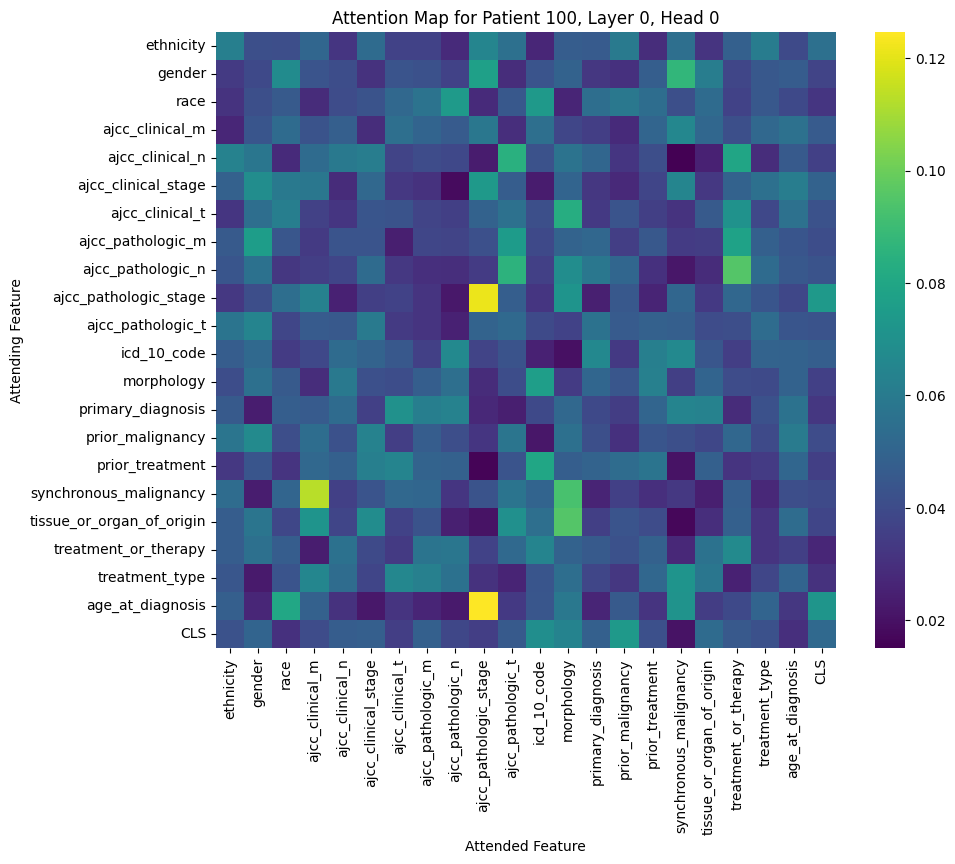

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your feature names
feature_names = categorical_columns + ['age_at_diagnosis'] + ['CLS']

# Function to visualize the attention map for a specific patient, layer, and head
def visualize_attention(patient_idx, layer_idx, head_idx, attn_weights, feature_names):
    # Extract the attention map for the specific patient, layer, and head
    attention_map = attn_weights[layer_idx, patient_idx, head_idx, :, :].detach().numpy()

    # Create a heatmap with feature names as labels
    plt.figure(figsize=(10, 8))
    sns.heatmap(attention_map, xticklabels=feature_names, yticklabels=feature_names, cmap='viridis')
    plt.title(f"Attention Map for Patient {patient_idx}, Layer {layer_idx}, Head {head_idx}")
    plt.xlabel("Attended Feature")
    plt.ylabel("Attending Feature")
    plt.show()

# Example usage: Visualize attention map for the first patient, first layer, and first head
visualize_attention(patient_idx=100, layer_idx=0, head_idx=0, attn_weights=attn_weights, feature_names=feature_names)


**Perform clustering on the embeddings**

In [84]:
from sklearn.cluster import KMeans

head_cluster_labels = {}

layer_idx = -1

for head_idx in range(attn_weights.size(2)):  # 8 heads
    # Extract and flatten attention maps for this head
    attention_maps_per_head = attn_weights[layer_idx, :, head_idx, :, :].detach().numpy().reshape(attn_weights.size(1), -1)

    # Perform K-Means clustering to create 2 clusters
    kmeans = KMeans(n_clusters=2, random_state=42)
    cluster_labels_per_head = kmeans.fit_predict(attention_maps_per_head)
    
    # Store the cluster labels for this head
    head_cluster_labels[f'head_{head_idx}'] = cluster_labels_per_head

# Add these labels to the clinical data
for head_idx, labels in head_cluster_labels.items():
    clinical_data_final[f'cluster_label_{head_idx}'] = labels


print(clinical_data_final[f'cluster_label_head_7'].value_counts())


1    309
0    218
Name: cluster_label_head_7, dtype: int64


In [85]:
for a in clinical_data_final.items():
    print(a)

('case_id', 4       0394060d-010e-405f-983d-db525f01f2c3
6       039788ec-1364-40c7-9e9d-13dc305674e9
10      03b57fee-55c7-4873-b7ef-e29abd98863a
12      03c3ae62-d0aa-412e-bd3c-4577fc9f919c
16      05f01280-bf77-4682-a7a8-20dd0eac77bd
                        ...                 
1020    f76ab158-2cf9-4df7-b6fe-727dd69a369f
1026    f8acc36b-1e7f-44b8-83b7-f894ad201833
1032    fa9f6b24-16b4-4dda-acce-bf2e186d365d
1040    fc3ea52b-67ac-4876-949d-5464c436f3db
1046    fd7e2226-8086-4a56-867b-6457b87a7fed
Name: case_id, Length: 527, dtype: object)
('case_submitter_id', 4       TCGA-BB-A5HY
6       TCGA-CN-6998
10      TCGA-CN-A6V1
12      TCGA-BB-A6UM
16      TCGA-BB-4223
            ...     
1020    TCGA-CR-7377
1026    TCGA-CR-7371
1032    TCGA-CV-A463
1040    TCGA-CR-7374
1046    TCGA-MZ-A5BI
Name: case_submitter_id, Length: 527, dtype: object)
('ethnicity', 4       1
6       1
10      2
12      1
16      1
       ..
1020    1
1026    1
1032    0
1040    1
1046    0
Name: ethnicity, Len

In [87]:
import os
import json

# File paths
embeddings_folder = 'TCGA-HNSC-embeddings-flatten-per-patient'
json_file_path = 'svs_patient_map_DFS.json'
output_json_file = 'svs_patient_map_DFS_clinical_labels.json'

# Load the JSON metadata
with open(json_file_path, 'r') as f:
    metadata = json.load(f)

# Create a new list to hold the updated entries
updated_metadata = []

# Iterate through each entry in the metadata
for entry in metadata:
    case_id = entry['case_id']
    
    # Find matching row in the clinical data
    matching_row = clinical_data_final[clinical_data_final['case_id'] == case_id]
    
    if not matching_row.empty:
        # Modify the file name to match the format in the embeddings folder
        file_name = entry['file_name'].replace('.svs', '_flatten.pt')
        file_path = os.path.join(embeddings_folder, file_name)
        
        # Check if the corresponding file exists in the embeddings folder
        if os.path.exists(file_path):
            # Add cluster labels for each head to the entry
            for head_idx in range(8):  # Assuming 8 heads
                cluster_label_column = f'cluster_label_head_{head_idx}'
                entry[cluster_label_column] = int(matching_row[cluster_label_column].values[0])
            
            # Append the updated entry to the new list
            updated_metadata.append(entry)

# Save the updated metadata to a new JSON file
with open(output_json_file, 'w') as f:
    json.dump(updated_metadata, f, indent=4)

# Print the count of total entries in the final JSON
print("Total number of entries in the final JSON:", len(updated_metadata))

# Print the length of clinical_data_final
print("Total number of entries in clinical_data_final:", len(clinical_data_final))



Total number of entries in the final JSON: 473
Total number of entries in clinical_data_final: 527
